# El ABC del modelo predictivo

![Baner_imagen](https://i.ibb.co/XDCkh3r/Banner-ABC-modelo.png)


**Angel Jorge Salazar | Analista de datos | Data Scientist  @ Kobranzas SAC**
* Correo: angel.jorge@unmsm.edu.pe
* Linkedin: https://www.linkedin.com/in/angel-jorge-salazar-7b3bb614b/
* Github: https://github.com/ANGELJSS
* Nro: +51 961 352 833
---
**Heydy Mayumy Carrasco Huaccha | Analista de datos | Data Analytic  @ Contraloria General de la Republica del Perú**
* Correo: heydy.carrasco.huaccha@gmail.com
* Linkedin: https://www.linkedin.com/in/heydy-mayumy-carrasco-huaccha-3876bb137/
* Github: https://github.com/MayumyCH
* Nro: +51 943377187
---

## 0.- Importación de librerias


In [ ]:
import pandas as pd # Manejo de data estructurada (Dataframe)
import numpy as np #Manejo de matrices
import matplotlib.pyplot as plt # Gráficas
import seaborn as sns  #Gráficas sencillas

from sklearn.model_selection import train_test_split # Separar datos en Train(Entrenamiento) y Test(Prueba)

Usamos una semilla a lo largo de todo el notebook para los procesos aleatorios

In [ ]:
seed=2021 # Una semilla se usa para que el modelo sea replicable

**FUNCIONES GENERALES**

In [ ]:
def analisisNumericas(df, variable):
  # fig, ax = plt.subplots(1, 2,figsize=(12, 4))
  # ax[0].hist(df[variable], bins=25)
  # ax[1].boxplot(df[variable],0, 'gD')
  # plt.show()

  print(" "*20,"Histograma"," "*20)
  df[variable].plot.hist(bins=25,figsize=(8,4),color="#CABDE9")
  plt.show()
  print("\n")
  print(" "*20,"Boxplot"," "*20)
  df[variable].plot.box(figsize=(8,4))
  plt.show()

def analisisCategoricas(df, variable):
  frecuencia_absoluta = pd.DataFrame(df[variable].astype('str').fillna('Nulo').value_counts(dropna = False))
  frecuencia_absoluta.columns = ['FREC_ABS'] 
  frecuencia_relativa = pd.DataFrame(df[variable].astype('str').fillna('Nulo').value_counts(normalize = True, dropna = False))
  frecuencia_relativa.columns = ['FREC_REL'] 
  tablaResumen = pd.concat([frecuencia_absoluta,frecuencia_relativa], axis = 1)
  display(tablaResumen)
  tablaResumen
  plt.bar(x = tablaResumen.index, height = tablaResumen['FREC_ABS'], color="#CABDE9")
  for i, txt in enumerate(tablaResumen['FREC_ABS']):
    plt.annotate(str(txt), (i, txt), fontsize = 12)
  plt.twinx()
  plt.plot(tablaResumen['FREC_REL'], linestyle='-', linewidth=2.0, color='red')
  plt.ylim(0, 1)
  for i, txt in enumerate(tablaResumen['FREC_REL']):
    plt.annotate(str(round(txt * 100, 1)) + '%', (i, txt), fontsize = 12, ha='center')
  plt.show()

## 1.- Comprensión del Negocio

*La entidad financiera en estudio desea elevar sus ratios de aceptación para el producto del prestamo hipotecario por lo que desea identificar que clientes son más propensos a aceptar el prestamo hipotecario.*

## 2.- Comprensión de los datos

**En esta etapa nos avocaremos a conocer todo lo referente a los datos con los que contamos**

![img](https://i.ibb.co/PGP4KhH/descripcion-variable.png)

### 2.1.- Recopilación de los Datos


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aldochavez/datasets/main/AdquisicionCreditoHipotecario.csv', index_col=False)
df.head()

,Loan ID,Gender,Married,Dependents,Education,Self Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape
# INTERPRETACION:
# 614 observaciones | registros o filas
# 13 variables | features o columnas

(614, 13)

In [ ]:
# df.info()

In [ ]:
target = 'Loan_Status'

In [ ]:
#Transformamos la variable respuesta(Label) a una variable binaria
# Y=1, N=0
df[target] = df[target].replace(['Y','N'],[1,0])

In [ ]:
df[target].value_counts()
### Donde:
# 1 nos indica: personas  que aceptaron el crédito
# 0 nos indica: personas que no aceptaron el crédito

1    422
0    192
Name: Loan_Status, dtype: int64

In [ ]:
df[target].value_counts(normalize = True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

Text(0, 0.5, 'Numero de observaciones')

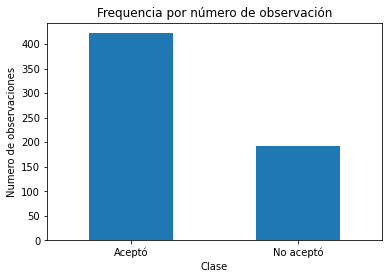

In [ ]:
### Observamos la frecuencia de los datos a predecir(class)###
LABELS =['Aceptó','No aceptó']
count_classes = pd.value_counts(df['Loan_Status'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title("Frequencia por número de observación")
plt.xlabel("Clase")
plt.ylabel("Numero de observaciones")

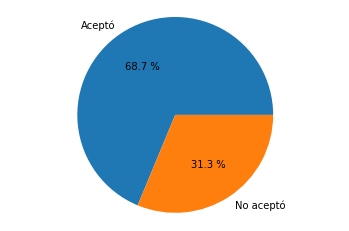

In [ ]:
# Observamos la etiqueta en porcentajes y en gráfico pastel
plt.pie(pd.value_counts(df['Loan_Status']), labels=LABELS, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

### 2.2  División en conjuntos de entrenamiento y prueba

In [ ]:
df.head(2)

,Loan ID,Gender,Married,Dependents,Education,Self Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0


In [ ]:
# No se considera como una variable el id(llave de la data)
X = df.iloc[:,1:12]
y = df[target]

In [ ]:
X.head(2)

,Gender,Married,Dependents,Education,Self Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural


In [ ]:
#División de la data 
# stratify:se usa para mantener la homogeneidad en la división de los data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = seed)

![](https://miro.medium.com/max/724/1*-8_kogvwmL1H6ooN1A1tsQ.png)

### 2.3.- Exploración de los Datos

In [ ]:
# Para variables Numéricas
X_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit History
count,491.000000,491.000000,472.000000,481.000000,451.000000
mean,5577.175153,1571.759511,147.294492,341.413721,0.842572
std,6642.808005,2764.253596,87.981011,64.350063,0.364608
min,210.000000,0.000000,9.000000,12.000000,0.000000
25%,2874.500000,0.000000,100.000000,360.000000,1.000000
50%,3813.000000,1131.000000,127.000000,360.000000,1.000000
75%,5892.000000,2264.500000,172.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
# Para variables categóricas
X_train.describe(include = 'object')

,Gender,Married,Dependents,Education,Self Employed,Property_Area
count,480,490,481,491,465,491
unique,2,2,4,2,2,3
top,Male,Yes,0,Graduate,No,Semiurban
freq,388,320,272,388,396,180


**Aplicaremos diversas técnicas estadísticas para conocer más a profundidad los datos**

Exploramos las distribuciones y percentiles de las variables

In [ ]:
varCategoricas = ['Gender','Married','Dependents','Education','Self Employed','Credit History','Property_Area']
varNumericas = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

#################### ApplicantIncome ####################
                     Histograma                     


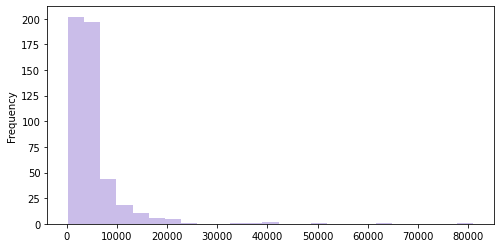



                     Boxplot                     


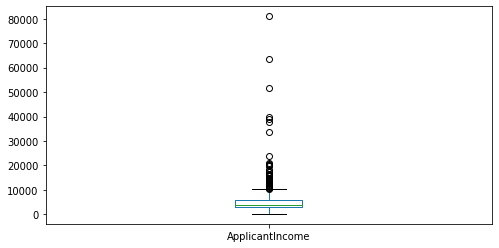




#################### CoapplicantIncome ####################
                     Histograma                     


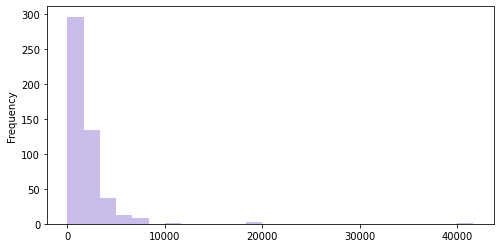



                     Boxplot                     


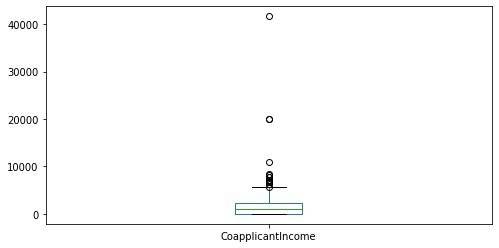




#################### LoanAmount ####################
                     Histograma                     


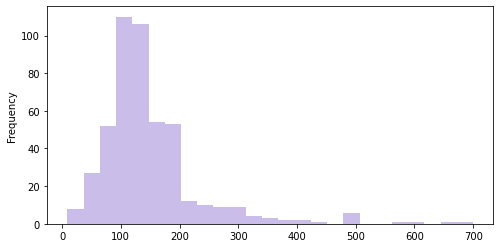



                     Boxplot                     


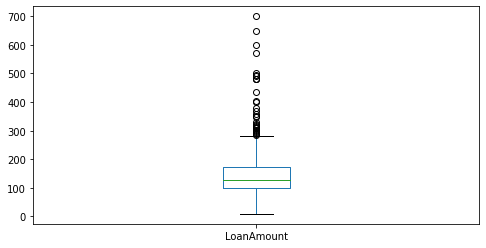




#################### Loan_Amount_Term ####################
                     Histograma                     


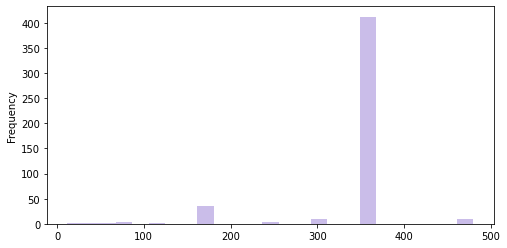



                     Boxplot                     


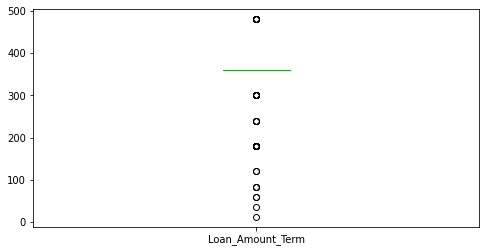

In [ ]:
for numerica in varNumericas:
  print("#"*20,numerica,"#"*20)
  analisisNumericas(X_train, numerica)
  print("\n\n")

-------------------- Gender --------------------


,FREC_ABS,FREC_REL
Male,388,0.790224
Female,92,0.187373
nan,11,0.022403


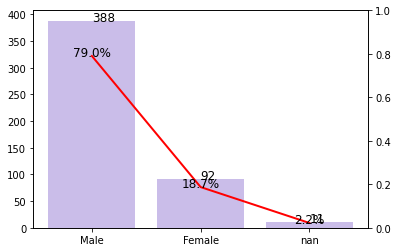




-------------------- Married --------------------


,FREC_ABS,FREC_REL
Yes,320,0.651731
No,170,0.346232
nan,1,0.002037


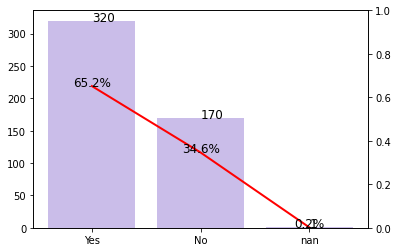




-------------------- Dependents --------------------


,FREC_ABS,FREC_REL
0,272,0.553971
2,87,0.177189
1,81,0.164969
3+,41,0.083503
nan,10,0.020367


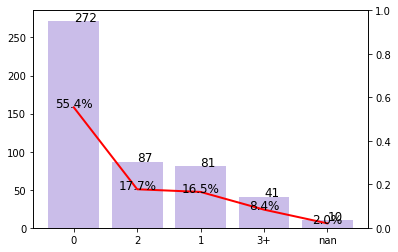




-------------------- Education --------------------


,FREC_ABS,FREC_REL
Graduate,388,0.790224
Not Graduate,103,0.209776


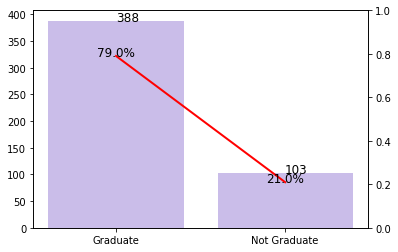




-------------------- Self Employed --------------------


,FREC_ABS,FREC_REL
No,396,0.806517
Yes,69,0.140530
nan,26,0.052953


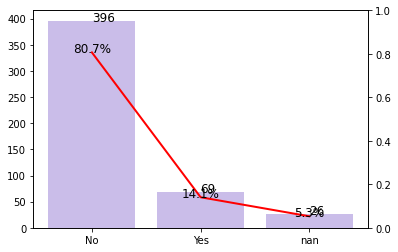




-------------------- Credit History --------------------


,FREC_ABS,FREC_REL
1.0,380,0.773931
0.0,71,0.144603
nan,40,0.081466


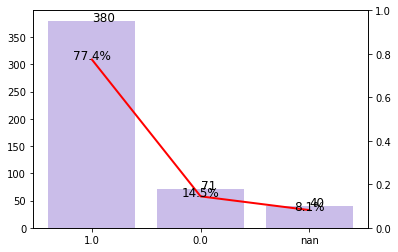




-------------------- Property_Area --------------------


,FREC_ABS,FREC_REL
Semiurban,180,0.366599
Urban,168,0.342159
Rural,143,0.291242


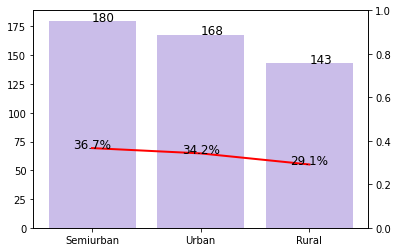

In [ ]:
#Sacamos el analisis categorico para cada variable
for categorica in varCategoricas:
    print("-"*20,categorica,"-"*20)
    analisisCategoricas(X_train, categorica)
    print("\n\n")

## 3 Preprocesamiento de los datos


### 3.1.- Análisis y tratamiento de valores Nulos

In [ ]:
import missingno as msno

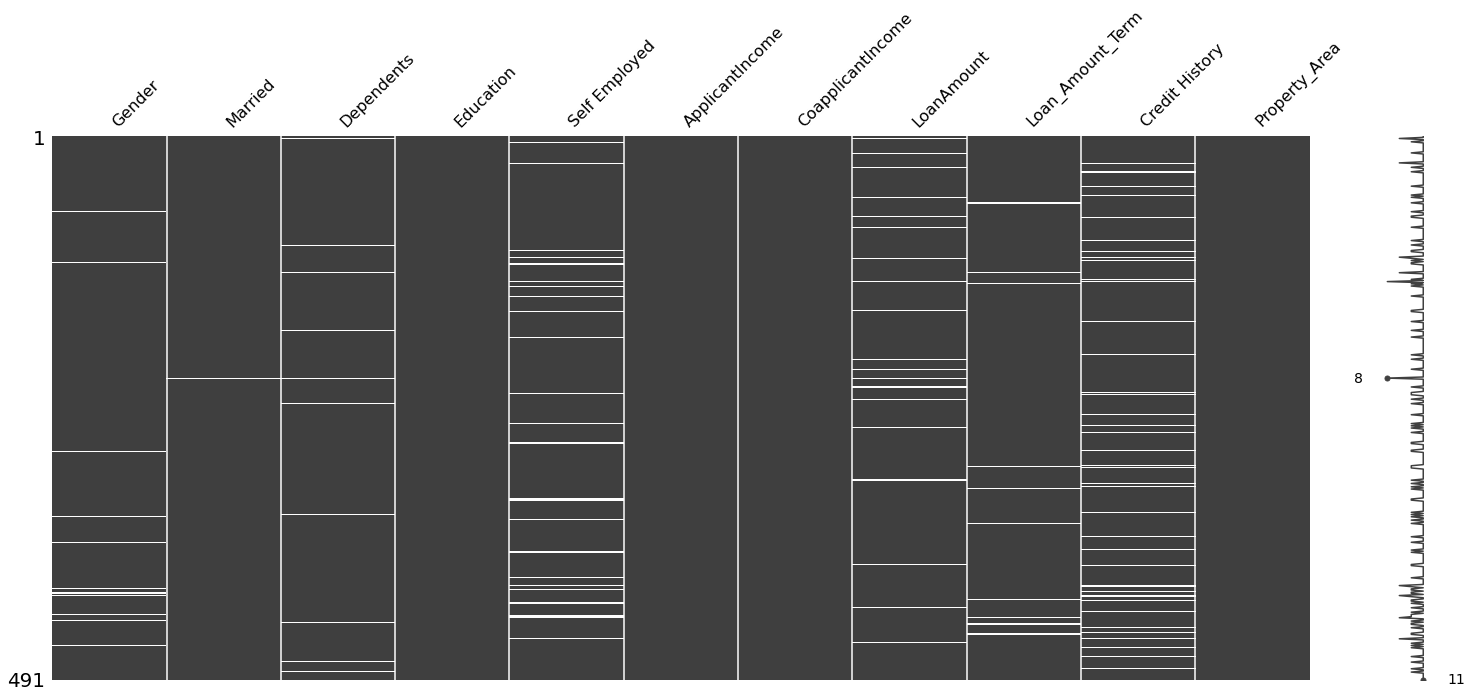

In [ ]:
#Corroboramos la existencia de variables nulos en 7 de nuestras variables
msno.matrix(X_train)

In [ ]:
#Notamos la existencia de variables nulos
X_train.isnull().sum()

Gender               11
Married               1
Dependents           10
Education             0
Self Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           19
Loan_Amount_Term     10
Credit History       40
Property_Area         0
dtype: int64

### 3.2.- Separando variables Categóricas y Numéricas

In [ ]:
# Separamos la variable numéricas
X_train_cat = X_train.select_dtypes('object')
# Separamos la variable categóricas
X_train_num = X_train.select_dtypes('number')

In [ ]:
X_train_cat.head(2)

,Gender,Married,Dependents,Education,Self Employed,Property_Area
316,Male,Yes,2,Graduate,No,Semiurban
292,Male,Yes,2,Graduate,No,Urban


In [ ]:
X_train_num.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit History
316,3717,0.0,120.0,360.0,1.0
292,3153,1560.0,134.0,360.0,1.0



Imputación de numéricas

In [ ]:
# Imputación: es la sustitución de valores no informados en una observación por otros.
# observamos el promedio
X_train['LoanAmount'].mean()

147.29449152542372

In [ ]:
# observamos la mediana
X_train['LoanAmount'].median()

127.0

In [ ]:
### Importamos SimpleImputer ###
###Para remplazar los valores nulos por los valores deseados ###
from sklearn.impute import SimpleImputer

In [ ]:
# Creamos imputer_num para reemplazar los valores nulos por la mediana
imputer_num = SimpleImputer(strategy = 'median')

In [ ]:
# Entrenamos las columnas a imputar
imputer_num.fit(X_train_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [ ]:
# Todas las medianas de cada una de las columnas
imputer_num.statistics_

array([3.813e+03, 1.131e+03, 1.270e+02, 3.600e+02, 1.000e+00])

In [ ]:
# Array de todos los valores de las columnas sin valores nulos - return numpy ndarray
imputer_num.transform(X_train_num)

array([[3.7170e+03, 0.0000e+00, 1.2000e+02, 3.6000e+02, 1.0000e+00],
       [3.1530e+03, 1.5600e+03, 1.3400e+02, 3.6000e+02, 1.0000e+00],
       [1.3650e+04, 0.0000e+00, 1.2700e+02, 3.6000e+02, 1.0000e+00],
       ...,
       [6.5000e+03, 0.0000e+00, 1.0500e+02, 3.6000e+02, 0.0000e+00],
       [2.3330e+03, 1.5160e+03, 9.5000e+01, 3.6000e+02, 1.0000e+00],
       [3.9147e+04, 4.7500e+03, 1.2000e+02, 3.6000e+02, 1.0000e+00]])

In [ ]:
# De un array convertimos en dataframe
X_train_num_imputed = pd.DataFrame(data = imputer_num.transform(X_train_num), columns = X_train_num.columns)

In [ ]:
# Antes de la imputación
X_train_num.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit History
316,3717,0.0,120.0,360.0,1.0
292,3153,1560.0,134.0,360.0,1.0
102,13650,0.0,NaN,360.0,1.0


In [ ]:
# Después de la imputación
X_train_num_imputed.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit History
0,3717.0,0.0,120.0,360.0,1.0
1,3153.0,1560.0,134.0,360.0,1.0


In [ ]:
# Antes de la imputación
X_train_num.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           19
Loan_Amount_Term     10
Credit History       40
dtype: int64

In [ ]:
# Después de la imputación
X_train_num_imputed.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit History       0
dtype: int64

Imputación de variables categóricas

In [ ]:
### Reemplazamos con valores mas frecuentes a los valores nulos ### MODA
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_cat.fit(X_train_cat)
X_train_cat_imputed = pd.DataFrame(imputer_cat.transform(X_train_cat), columns = X_train_cat.columns)

X_train_cat_imputed.head()

,Gender,Married,Dependents,Education,Self Employed,Property_Area
0,Male,Yes,2,Graduate,No,Semiurban
1,Male,Yes,2,Graduate,No,Urban
2,Male,Yes,0,Graduate,No,Urban
3,Male,No,0,Graduate,No,Urban
4,Female,No,0,Graduate,No,Semiurban


In [ ]:
# Antes de la imputación
X_train_cat.isnull().sum()

Gender           11
Married           1
Dependents       10
Education         0
Self Employed    26
Property_Area     0
dtype: int64

In [ ]:
# Después de la imputación
X_train_cat_imputed.isnull().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self Employed    0
Property_Area    0
dtype: int64

Ya no tenemos valores nulos

### 3.3 Obtenemos valores dummies de nuestras variables categóricas

In [ ]:
# Las variables categóricas tranformamos en numerico(lenguaje de máquina)
X_train_cat_dummies = pd.get_dummies(X_train_cat_imputed, drop_first=True)
X_train_cat_dummies.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,1,0,0,0,1,0
1,1,1,0,1,0,0,0,0,1
2,1,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0



### 3.4 Tratamiento de outliers(valores extremos)

In [ ]:
# Vamos a topear la variable Ingresos Dependientes en 30 000
X_train_num_imputed.loc[X_train_num_imputed['ApplicantIncome'] >= 30000,'ApplicantIncome'] = 30000
# Vamos a topear la variable Ingresos Independientes en 15 000
X_train_num_imputed.loc[X_train_num_imputed['CoapplicantIncome'] >= 15000,'CoapplicantIncome'] = 15000

### 3.5 Consolidación de los datos

In [ ]:
# Concatenamos las columnas que habíamos separado en numéricos y categóricos
X_train_total = pd.concat([X_train_num_imputed, X_train_cat_dummies], axis = 1)
X_train_total.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,3717.0,0.0,120.0,360.0,1.0,1,1,0,1,0,0,0,1,0
1,3153.0,1560.0,134.0,360.0,1.0,1,1,0,1,0,0,0,0,1


In [ ]:
#Volvemos a verificar valores nulos
X_train_total.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

### 3.6 Ingeniería de variables

In [ ]:
# Creamos la variable Ingreso Total
X_train_total['Ingreso_Total'] = X_train_total['ApplicantIncome'] + X_train_total['CoapplicantIncome']
# Creamos la variable Cuota
X_train_total['Cuota'] = (X_train_total['LoanAmount'] / X_train_total['Loan_Amount_Term']) * 1000
# Creamos la variable Porcentaje Cuota
X_train_total['PCT_Cuota'] = X_train_total['Cuota'] / X_train_total['Ingreso_Total']

### 3.7 Estandarización

In [ ]:
# Escalamos los datos en el rango de 0 y 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_total), columns = X_train_total.columns)

In [ ]:
# Después del escalamiento
X_train_scaled.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Ingreso_Total,Cuota,PCT_Cuota
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.00000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.170814,0.099805,0.199000,0.704684,0.855397,0.812627,0.653768,0.164969,0.177189,0.083503,0.209776,0.14053,0.366599,0.342159,0.160731,0.049421,0.056249
std,0.155076,0.134536,0.124960,0.136206,0.352059,0.390608,0.476254,0.371532,0.382218,0.276923,0.407564,0.34789,0.482367,0.474916,0.142625,0.059847,0.067052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.089443,0.000000,0.131693,0.743590,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.081497,0.028305,0.038081
50%,0.120947,0.075400,0.170767,0.743590,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.119671,0.036134,0.049053
75%,0.190735,0.150967,0.231548,0.743590,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.183034,0.052454,0.059480
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Antes del escalamiento
X_train_total.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Ingreso_Total,Cuota,PCT_Cuota
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.00000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,5298.537678,1497.081303,146.509165,341.792261,0.855397,0.812627,0.653768,0.164969,0.177189,0.083503,0.209776,0.14053,0.366599,0.342159,6795.618982,480.908253,0.077480
std,4619.707393,2018.043248,86.347337,63.744240,0.352059,0.390608,0.476254,0.371532,0.382218,0.276923,0.407564,0.34789,0.482367,0.474916,4750.556849,552.089089,0.082373
min,210.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1442.000000,25.000000,0.008378
25%,2874.500000,0.000000,100.000000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4156.500000,286.111111,0.055161
50%,3813.000000,1131.000000,127.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5428.000000,358.333333,0.068639
75%,5892.000000,2264.500000,169.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,7538.500000,508.888889,0.081449
max,30000.000000,15000.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,34750.000000,9250.000000,1.236873


## 4 Repetir todo el preprocesamiento para el conjunto de validación

In [ ]:
X_test.head(2)

,Gender,Married,Dependents,Education,Self Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit History,Property_Area
450,Male,Yes,2,Not Graduate,No,2309,1255.0,125.0,360.0,0.0,Rural
244,Male,Yes,0,Not Graduate,No,3406,4417.0,123.0,360.0,1.0,Semiurban


In [ ]:
#X_test.info()

Imputación de nulos

In [ ]:
X_test_cat = X_test.select_dtypes('object')
X_test_num = X_test.select_dtypes('number')

In [ ]:
# Numéricas
X_test_num_imputed = pd.DataFrame(imputer_num.transform(X_test_num), columns = X_test_num.columns)
X_test_num_imputed.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit History
0,2309.0,1255.0,125.0,360.0,0.0
1,3406.0,4417.0,123.0,360.0,1.0


In [ ]:
# Vamos a topear la variable Ingresos Dependientes en 30 000
X_test_num_imputed.loc[X_test_num_imputed['ApplicantIncome'] >= 30000,'ApplicantIncome'] = 30000
# Vamos a topear la variable Ingresos Independientes en 15 000
X_test_num_imputed.loc[X_test_num_imputed['CoapplicantIncome'] >= 15000,'CoapplicantIncome'] = 15000

In [ ]:
# Categóricas
X_test_cat_imputed = pd.DataFrame(imputer_cat.transform(X_test_cat), columns = X_test_cat.columns)
X_test_cat_imputed.head(2)

,Gender,Married,Dependents,Education,Self Employed,Property_Area
0,Male,Yes,2,Not Graduate,No,Rural
1,Male,Yes,0,Not Graduate,No,Semiurban


In [ ]:
# Encoding
X_test_cat_dummies = pd.get_dummies(X_test_cat_imputed, drop_first=True)

In [ ]:
# Consolidación
X_test_total = pd.concat([X_test_num_imputed, X_test_cat_dummies], axis = 1)

In [ ]:
# Creamos la variable Ingreso Total
X_test_total['Ingreso_Total'] = X_test_total['ApplicantIncome'] + X_test_total['CoapplicantIncome']
# Creamos la variable Cuota
X_test_total['Cuota'] = (X_test_total['LoanAmount'] / X_test_total['Loan_Amount_Term']) * 1000
# Creamos la variable Porcentaje Cuota
X_test_total['PCT_Cuota'] = X_test_total['Cuota'] / X_test_total['Ingreso_Total']

In [ ]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test_total), columns = X_test_total.columns)

Verificamos que ambas tengan la misma cantidad de columnas

In [ ]:
X_train_scaled.shape, X_test_scaled.shape

(491, 17)

## 5 Balanceo de datos

<img src="https://i.ytimg.com/vi/TJJOz6thSfk/maxresdefault.jpg"
     alt="Logotipo de HTML5"  height="300" />

**Se aplica en los problemas clasificación y su finalidad es nivelar nuestras clases.**

Los métodos mas conocidos para balancear los datos son:
*  Subsampling (Disminuir la clase mayoritaria)
*  Oversampling (Incrementa la clase minoritaria)
*  Resampling con Smote-Tomek (Union de ambos metodos anteriores)



In [ ]:
# usamos el resampling
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='all', random_state=seed)
X_smt, y_smt = smt.fit_resample(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
print ("Distribution antes resampling {}".format(Counter(y_train)))
print ("Distribution después resampling {}".format(Counter(y_smt)))

Distribution antes resampling Counter({1: 337, 0: 154})
Distribution después resampling Counter({1: 312, 0: 312})


## 5 Modelamiento


In [ ]:
# Importamos la librerías
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# Creamos el modelo y entrenamos el modelo
model = linear_model.LogisticRegression()
model.fit(X_smt,y_smt)

score = model.score(X_smt,y_smt)
 
print("Metrica del modelo", score)

Metrica del modelo 0.7451923076923077


In [ ]:
from sklearn import metrics
preds = model.predict(X_test_scaled)
preds_proba = model.predict_proba(X_test_scaled)[:,1]
score_pred = metrics.f1_score(y_test, preds)
score_auc_pred = metrics.roc_auc_score(y_test, preds)
print("Metrica f1_score en Test", score_pred)
print("Metrica roc_auc en Test", score_auc_pred)

Metrica f1_score en Test 0.8539325842696629
Metrica roc_auc en Test 0.723374613003096


### 5.1 Métricas del modelo

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


def mostrar_resultados(y_test, preds):
    Matriz_Confusion = confusion_matrix(y_test, preds)
    plt.figure(figsize=(8, 8))
    sns.heatmap(Matriz_Confusion, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap='BrBG',linewidths = 0.5);
    plt.title("Matriz de confusión")
    plt.ylabel('Actual')
    plt.xlabel('Predicha')
    plt.show()
    print (classification_report(y_test, preds))

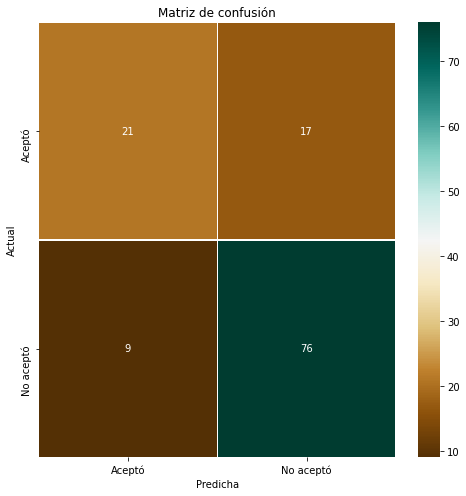

              precision    recall  f1-score   support

           0       0.70      0.55      0.62        38
           1       0.82      0.89      0.85        85

    accuracy                           0.79       123
   macro avg       0.76      0.72      0.74       123
weighted avg       0.78      0.79      0.78       123



In [ ]:
# Observamos la matriz de confusión
mostrar_resultados(y_test,preds)

## 6 Anexo

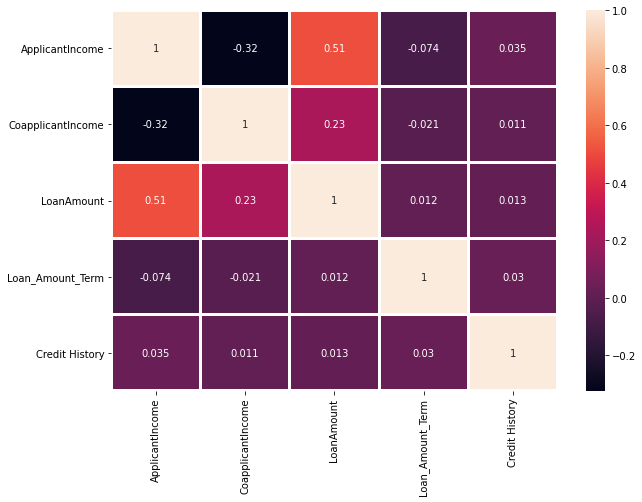

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(X_train_num_imputed.corr(method='spearman'), annot=True, linewidths=2)